### All standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rc('font', size = 11)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Paired'))
sns.palplot(sns.color_palette('Paired'))
sns.set()

### Preprocessing the dataset

In [2]:
#import pandas as pd
dataset_read = pd.read_excel('pilot_experiment_TPM_WTonly.xlsx') #reading the dataset using pandas read_excel function
unprocessed_dataset = dataset_read.iloc[:, 0:].T #Transpose of the raw dataset
y = dataset_read.columns.values.tolist() #getting the label/target labels as list from the dataset 

y_categorized = [] 
sample_list = []
#assigning categorical label to 0-9 (ascending order) to y_categorized as label for each sample
for i in y:
    if i[:-2] == 'Ox_Leaf1_T1':
        y_categorized.append(0)
        sample_list.append('L1T1')
    elif i[:-2] == 'Ox_Leaf1_T2':
        y_categorized.append(1)
        sample_list.append('L1T2')
    elif i[:-2] == 'Ox_Leaf1_T3':
        y_categorized.append(2)
        sample_list.append('L1T3')
    elif i[:-2] == 'Ox_Leaf1_T4':
        y_categorized.append(3)
        sample_list.append('L1T4')
    elif i[:-2] == 'Ox_Leaf3_T2':
        y_categorized.append(4)
        sample_list.append('L3T2')
    elif i[:-2] == 'Ox_Leaf3_T3':
        y_categorized.append(5)
        sample_list.append('L3T3')
    elif i[:-2] == 'Ox_Leaf3_T4':
        y_categorized.append(6)
        sample_list.append('L3T4')
    elif i[:-2] == 'Ox_Leaf5_T3':
        y_categorized.append(7)
        sample_list.append('L5T3')
    elif i[:-2] == 'Ox_Leaf5_T4':
        y_categorized.append(8)
        sample_list.append('L5T4')
    elif i[:-2] == 'Ox_Leaf7_T4':
        y_categorized.append(9)
        sample_list.append('L7T4')

unprocessed_dataset['y'] = y_categorized #putting the label information with the dataset, as the dataset does not contain the label
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values #getting the dataset without label, where each row represents sample, each column represents featues or independent variables
y = dataset.iloc[:, -1].values #label column from the data set

#for the plotting with the labels
#import numpy as np
sample_arr = np.array(sample_list)
set_sample = set(sample_list)
set_sample = sorted(list(set_sample))

### Visualization of the data by reducing the dimensionality with PCA

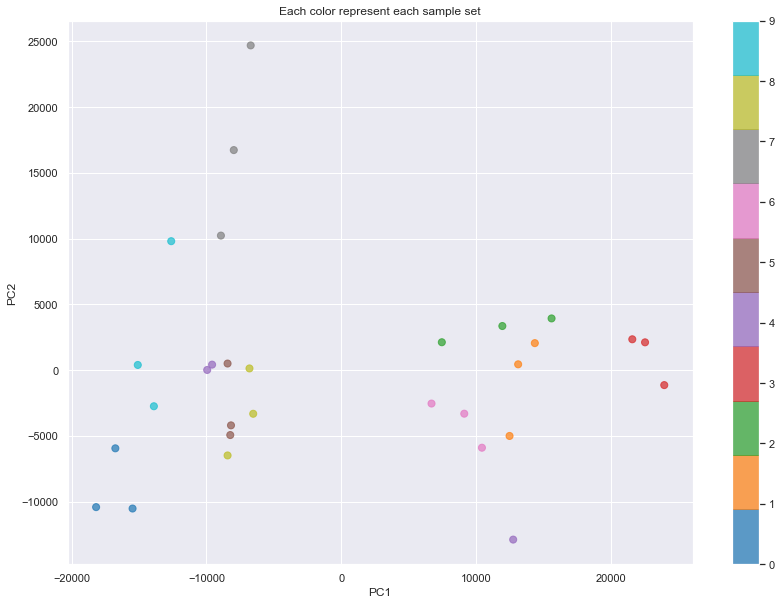

In [3]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
pca_visualization = PCA(n_components = 2)
X_transformed = pca_visualization.fit_transform(X) #transforming my features to 2 dimension(feature extraction from my orginal feature set)
#X_transformed = np.c_[X_transformed, y]
plt.figure(figsize = (14,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c = y, s = 50, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.title('Each color represent each sample set')
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Data.png', dpi = 200)
plt.show()

## KMeans
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
    - The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster center than to other cluster centers.
These two assumptions are the basis of the k-means model. There are 6 steps:
1) Randomly select k cluster centers.
2) Calculate the distance between each data point and cluster centers.
3) Assign the data point to the cluster center whose distance from the cluster center is minimum of all the cluster centers.
4) Recalculate the new cluster center.
5) Recalculate the distance between each data point and new obtained cluster centers.
6) If no data point was reassigned then stop, otherwise repeat from step 3).

##### scikit-learn(sklearn) is a machine learning library for the Python programming language. From sklearn, Kmeans(Unsupervised learning) was used with optimal parameters.
n_clusters: for Kmeans unlike other clustering algorithm, we need to predefine the no. of clusters while running the algorithm. n_clusters define the no. of clusters. For this task we know that we have 10 clusters.
init: k-means++ is an algorithm for choosing the initial values of the centroids for the k-means clustering algorithm.
n_init: the no. of time we want to run Kmeans algorithm with different cluster centroids.
max_iter: for a single run of Kmeans, the max no. of iteration.

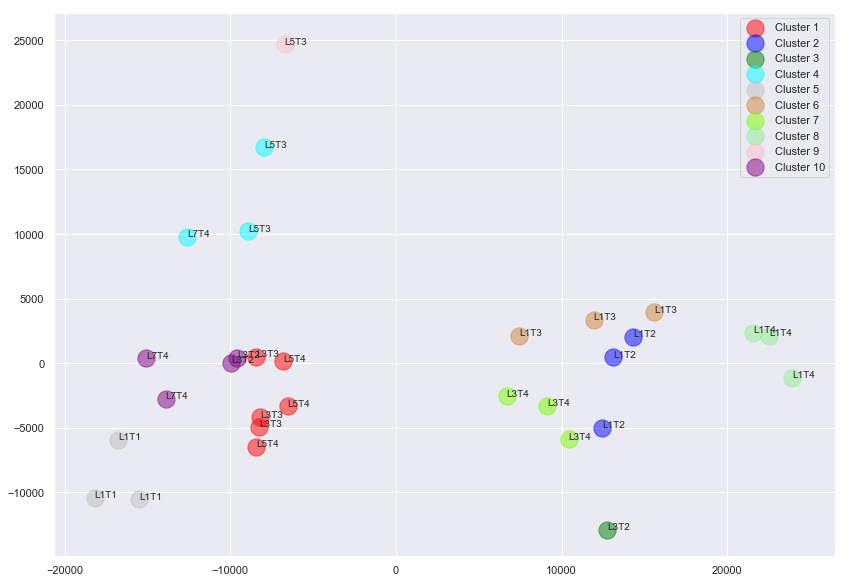

In [4]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
Kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100) #Creating the Kmeans algorith object
y_kmeans = Kmeans.fit_predict(X) #fitting the learning model to the data and predicting the clusters for the samples
plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 5, 0], X_transformed[y_kmeans == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 6, 0], X_transformed[y_kmeans == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 7, 0], X_transformed[y_kmeans == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 8, 0], X_transformed[y_kmeans == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 9, 0], X_transformed[y_kmeans == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/KMeans_Rawdata.png', dpi = 200)
plt.show()

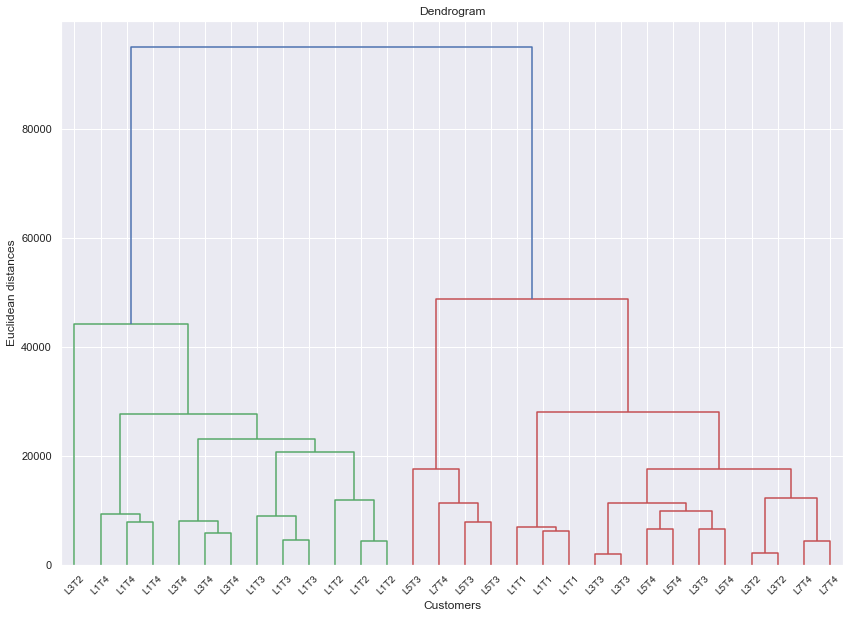

In [5]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (14,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), labels = sample_list)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

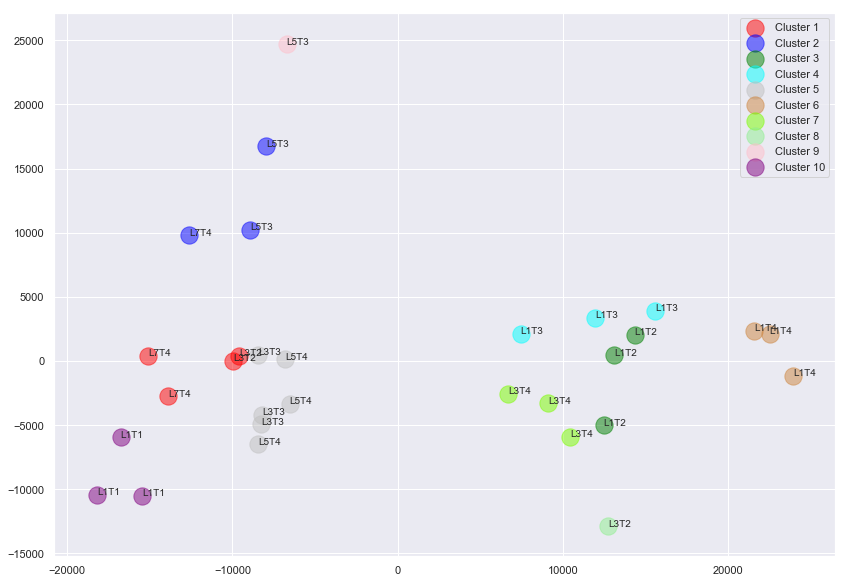

In [6]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_hc == 0, 0], X_transformed[y_hc == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 1, 0], X_transformed[y_hc == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 2, 0], X_transformed[y_hc == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 3, 0], X_transformed[y_hc == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 4, 0], X_transformed[y_hc == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 5, 0], X_transformed[y_hc == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_hc == 6, 0], X_transformed[y_hc == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 7, 0], X_transformed[y_hc == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 8, 0], X_transformed[y_hc == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 9, 0], X_transformed[y_hc == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/KMeans_Rawdata.png', dpi = 200)
plt.show()

## Evaluating the learned Kmeans model by comparing with our actual label y from the confusion matrix

The accuracy score for optimized K-means algorithm 0.8.


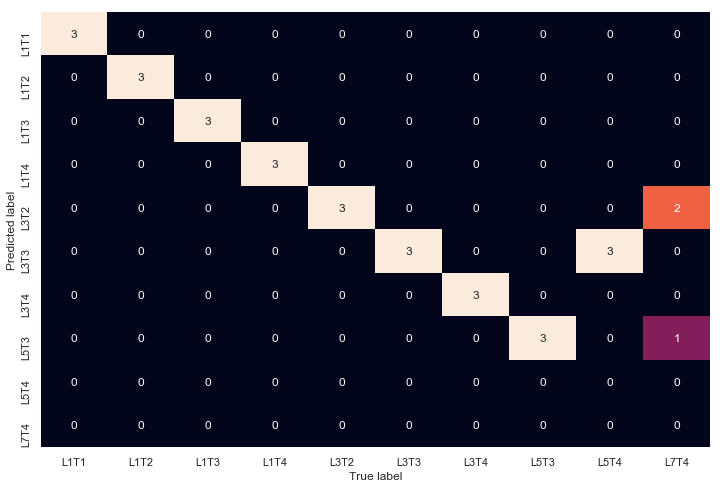

In [7]:
#from scipy.stats import mode
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#import numpy as np
labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

acc_score = accuracy_score(y, labels)
print('The accuracy score for optimized K-means algorithm {}.'.format(acc_score))
mat = confusion_matrix(y, labels)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(mat.T, square = False, annot = True, fmt = 'd', cbar = False, xticklabels = set_sample, yticklabels = set_sample)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/ConfusionMatrix_RawData.png', dpi = 200)

## Disadvantages

-The learning algorithm requires apriori specification of the number of  cluster centers.
-The use of  Exclusive Assignment - If  there are two highly overlapping data then k-means will not be able to resolve       that there are two clusters.
-The learning algorithm is not invariant to non-linear transformations i.e. with different representation of data we get
different results.
-Randomly choosing of the cluster center cannot lead us to the fruitful result.
-Unable to handle noisy data and outliers.
-Algorithm fails for non-linear data set.

#### By defining random_state = 19 or 35, we get 93.33% accuracy for the model. But the Kmeans algorithm has to run just once with the cluster centroid initialized by random state 19 or 35. This gives 93.33% accuracy based on the data we have, the model does not generalize. If we have unlabeled data the Kmeans with this predefined parameter will not be able to give optimal result.

The accuracy score for optimized K-means algorithm 0.9333333333333333.


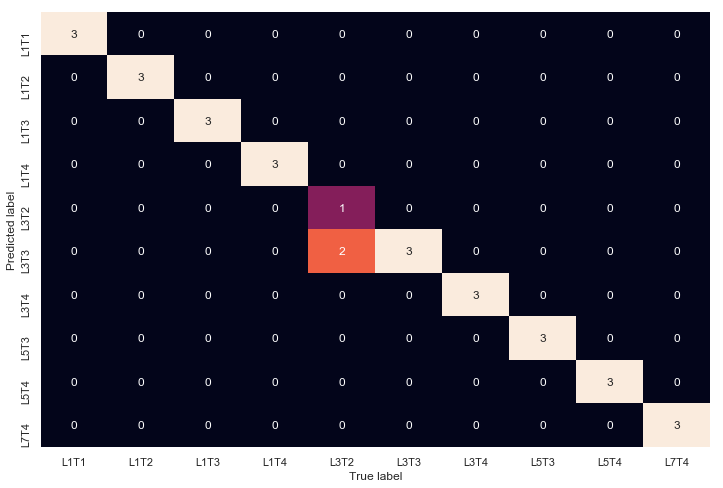

In [8]:
Kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 1, n_init = 1, random_state = 19) #Creating the Kmeans algorith object
y_kmeans = Kmeans.fit_predict(X) #fitting the learning model to the data and predicting the clusters for the samples
labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

acc_score = accuracy_score(y, labels)
print('The accuracy score for optimized K-means algorithm {}.'.format(acc_score))
mat = confusion_matrix(y, labels)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(mat.T, square = False, annot = True, fmt = 'd', cbar = False, xticklabels = set_sample, yticklabels = set_sample)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Limitation_Kmeans_Rand_init_RS19or35_ninit_1or2.png', dpi = 200)


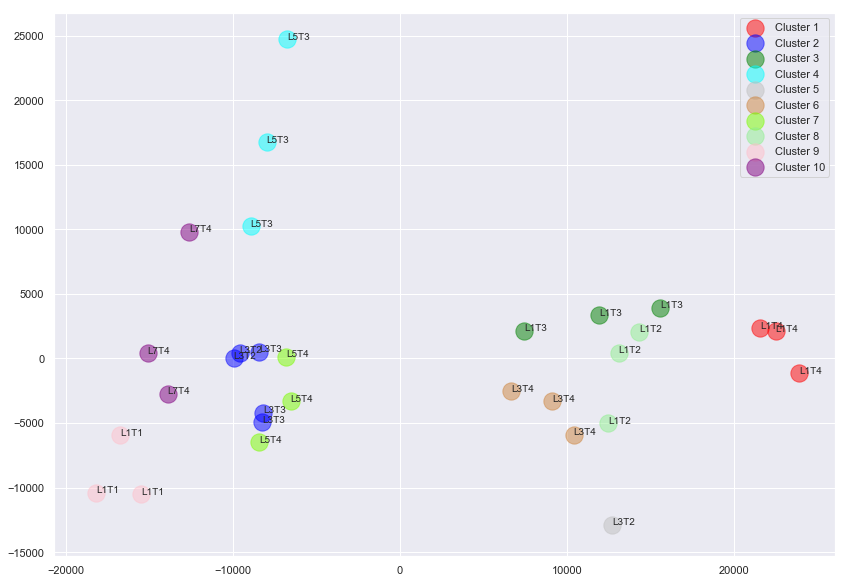

The accuracy score for optimized K-means algorithm 0.9333333333333333.


In [9]:
Kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 1000, n_init = 1, random_state = 35) #Creating the Kmeans algorith object
y_kmeans = Kmeans.fit_predict(X)
plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 5, 0], X_transformed[y_kmeans == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 6, 0], X_transformed[y_kmeans == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 7, 0], X_transformed[y_kmeans == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 8, 0], X_transformed[y_kmeans == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 9, 0], X_transformed[y_kmeans == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Limit_Kmeans_Rand_init_RS19or35_ninit_1or2.png', dpi = 200)
plt.show()
labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

acc_score = accuracy_score(y, labels)
print('The accuracy score for optimized K-means algorithm {}.'.format(acc_score))

## Methods to choose the number of clusters.
For our task we have the label information and we know we have 10 clusters. In case we dont have the label or cluster no. information and we need to pick optimal no. of clusters, the most easiest way of doing this is the use of Elbow method.
Elbow method is used with either squared error(sse) or within cluster sum of errors(wcss). Here I have used wcss to find the optimal number of clusters.
wcss is the summation of the distance of clusters centroids to its all data points for each cluster. If we plot the wcss value against the number of clusters we end up getting a elbow shape graph. If we draw a straight line from point 1 to 10, and if we calculate the distance from each point to this line, point with the largest distance should be the point that contains the elbow and thats the no. of optimal clusters.

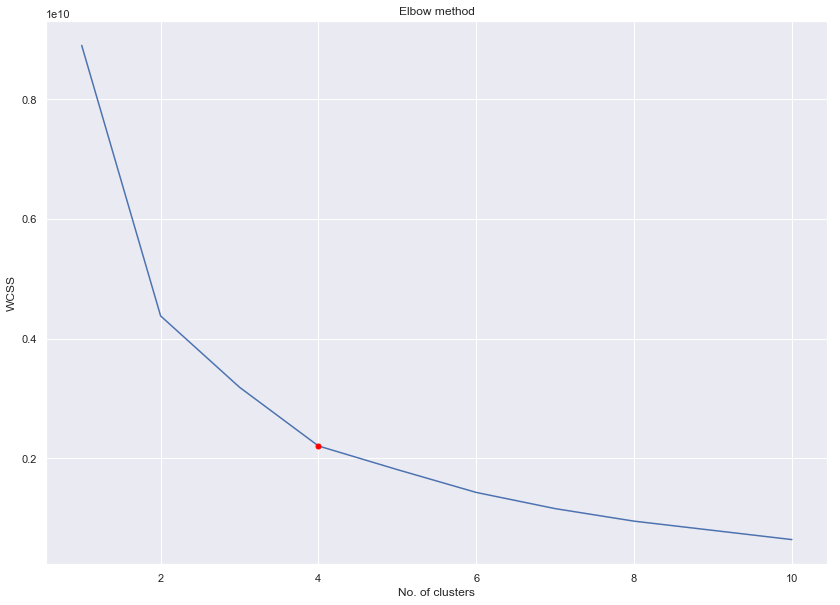

In [10]:
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 100)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

plt.figure(figsize = (14,10))
plt.plot(range(1,11), wcss)
plt.plot([4],wcss[3],marker = 'o', markersize = 5, color = 'red', label = 'Maximum Variance')
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Elbow_method_RawData.png', dpi = 200)
plt.show()

#### Silhouette Analysis(S.A.) is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a way to find out the optimum value for k during k-means clustering. Silhouette values lies in the range of [-1, 1]. Value of +1 is ideal and -1 is least preferred. Higher the value better is the cluster configuration.
Avg Silhouette score: This gives us one value representing the Silhouette score of the entire cluster. The mean value should be as close to 1 as possible. Each cluster should be above the mean value as much as possible. Any cluster below the mean value is not desirabl.e
Silhouette samples score: for all the samples belonging to a given cluster (from 2 to k), calculates the individual silhouette score of each sample belong to that cluster.

In [11]:
#from sklearn.metrics import silhouette_samples, silhouette_score
avg_sil_score = []
for i in range(2,11):
    kmeans_sil = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 100)
    y_kmeans_sil = kmeans_sil.fit_predict(X)
    centers = kmeans_sil.cluster_centers_

    score = silhouette_score(X, y_kmeans_sil)
    sample_silhouette_values = silhouette_samples(X, y_kmeans_sil)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))
    avg_sil_score.append((score))
    
print("For {}, silhouette score is {})".format('2 Clusters', avg_sil_score[0]))
print("For {}, silhouette score is {})".format('4 Clusters', avg_sil_score[2]))

For n_clusters = 2, silhouette score is 0.45501260707887625)
For n_clusters = 3, silhouette score is 0.4325133658820122)
For n_clusters = 4, silhouette score is 0.4525020144481372)
For n_clusters = 5, silhouette score is 0.40853898539707134)
For n_clusters = 6, silhouette score is 0.34243619343999665)
For n_clusters = 7, silhouette score is 0.3586343914570724)
For n_clusters = 8, silhouette score is 0.39953554517883144)
For n_clusters = 9, silhouette score is 0.3733922498225085)
For n_clusters = 10, silhouette score is 0.3401595018936074)
For 2 Clusters, silhouette score is 0.45501260707887625)
For 4 Clusters, silhouette score is 0.4525020144481372)


## For optimal no. of clusters(4 Clusters) as found from elbow method and S.A. method.

In [12]:
dataset_read = pd.read_excel('pilot_experiment_TPM_WTonly.xlsx')
unprocessed_dataset = dataset_read.iloc[:, 0:].T
y_ = dataset_read.columns.values.tolist()
y_categorized = []
sample_list = []
for i in y_:
    if i[:8] == 'Ox_Leaf1':
        y_categorized.append(0)
        sample_list.append('L1')
    elif i[:8] == 'Ox_Leaf3':
        y_categorized.append(1)
        sample_list.append('L3')
    elif i[:8] == 'Ox_Leaf5':
        y_categorized.append(2)
        sample_list.append('L5')
    elif i[:8] == 'Ox_Leaf7':
        y_categorized.append(3)
        sample_list.append('L7')

unprocessed_dataset['y'] = y_categorized
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
sample_arr = np.array(sample_list)

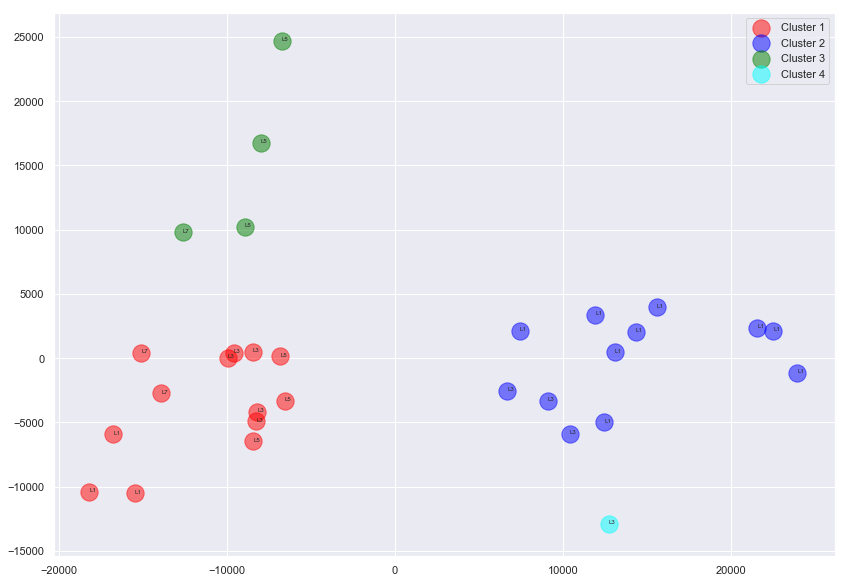

In [13]:
Kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 100)
y_kmeans = Kmeans.fit_predict(X)

pca_visualization = PCA(n_components = 2)
X_transformed = pca_visualization.fit_transform(X)

plt.rc('font', size = 6)
fig, ax = plt.subplots(figsize = (14,10))
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)

for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Kmeans_Four_Cluster_RawData.png', dpi = 200)
plt.show()

In [14]:
labels = np.zeros_like(y_kmeans)
for i in range(4):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

acc_score = accuracy_score(y, labels)
print('The accuracy score for optimized K-means algorithm {}.'.format(acc_score))

The accuracy score for optimized K-means algorithm 0.6.
